# Phishing Detection

Phishing attacks aim to steal or damage sensitive data by deceiving people into revealing personal information like passwords and credit card numbers. Therefore it is necessary to detect phishing attacks.

The objective of this analysis is to detect phishing attacks that can come through URLs. Different aspects of URLs are used for detection finally letting us know if the URL is a genuine or fradulent.

The dataset used in the analysis is from kaggle: https://www.kaggle.com/datasets/shashwatwork/web-page-phishing-detection-dataset

### Exploratory Data Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from scipy.stats import randint

from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

In [2]:
# Loading the dataset
raw_data = pd.read_csv("dataset_phishing.csv")
display(raw_data.head())

url  length_url  \
0              http://www.crestonwood.com/router.php          37   
1  http://shadetreetechnology.com/V4/validation/a...          77   
2  https://support-appleld.com.secureupdate.duila...         126   
3                                 http://rgipt.ac.in          18   
4  http://www.iracing.com/tracks/gateway-motorspo...          55   

   length_hostname  ip  nb_dots  nb_hyphens  nb_at  nb_qm  nb_and  nb_or  ...  \
0               19   0        3           0      0      0       0      0  ...   
1               23   1        1           0      0      0       0      0  ...   
2               50   1        4           1      0      1       2      0  ...   
3               11   0        2           0      0      0       0      0  ...   
4               15   0        2           2      0      0       0      0  ...   

   domain_in_title  domain_with_copyright  whois_registered_domain  \
0                0                      1                        0   
1                1                      0                        0   
2                1                      0                        0   
3                1                      0                        0   
4                0                      1                        0   

   domain_registration_length  domain_age  web_traffic  dns_record  \
0                          45          -1            0           1   
1                          77        5767            0           0   
2                          14        4004      5828815           0   
3                          62          -1       107721           0   
4                         224        8175         8725           0   

   google_index  page_rank      status  
0             1          4  legitimate  
1             1          2    phishing  
2             1          0    phishing  
3             0          3  legitimate  
4             0          6  legitimate  

[5 rows x 89 columns]

In [3]:
raw_data.shape

(11430, 89)

There are 11430 observations and 89 features

In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11430 entries, 0 to 11429
Data columns (total 89 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   url                         11430 non-null  object 
 1   length_url                  11430 non-null  int64  
 2   length_hostname             11430 non-null  int64  
 3   ip                          11430 non-null  int64  
 4   nb_dots                     11430 non-null  int64  
 5   nb_hyphens                  11430 non-null  int64  
 6   nb_at                       11430 non-null  int64  
 7   nb_qm                       11430 non-null  int64  
 8   nb_and                      11430 non-null  int64  
 9   nb_or                       11430 non-null  int64  
 10  nb_eq                       11430 non-null  int64  
 11  nb_underscore               11430 non-null  int64  
 12  nb_tilde                    11430 non-null  int64  
 13  nb_percent                  114

Out of 89 columns, two features are text - URL and status. Status is categorical and URL is nominal. Other features are numerical.

88 columns are predictor variables and 1 column called 'status' is the target variable

In [5]:
# Checking the number of missing values in each column of dataset
raw_data.columns[raw_data.isna().any()].tolist()

[]

There are no missing values in the dataset

In [6]:
# Summary statistics
raw_data.describe()

length_url  length_hostname            ip       nb_dots  \
count  11430.000000     11430.000000  11430.000000  11430.000000   
mean      61.126684        21.090289      0.150569      2.480752   
std       55.297318        10.777171      0.357644      1.369686   
min       12.000000         4.000000      0.000000      1.000000   
25%       33.000000        15.000000      0.000000      2.000000   
50%       47.000000        19.000000      0.000000      2.000000   
75%       71.000000        24.000000      0.000000      3.000000   
max     1641.000000       214.000000      1.000000     24.000000   

         nb_hyphens         nb_at         nb_qm        nb_and    nb_or  \
count  11430.000000  11430.000000  11430.000000  11430.000000  11430.0   
mean       0.997550      0.022222      0.141207      0.162292      0.0   
std        2.087087      0.155500      0.364456      0.821337      0.0   
min        0.000000      0.000000      0.000000      0.000000      0.0   
25%        0.000000      0.000000      0.000000      0.000000      0.0   
50%        0.000000      0.000000      0.000000      0.000000      0.0   
75%        1.000000      0.000000      0.000000      0.000000      0.0   
max       43.000000      4.000000      3.000000     19.000000      0.0   

              nb_eq  ...   empty_title  domain_in_title  \
count  11430.000000  ...  11430.000000     11430.000000   
mean       0.293176  ...      0.124759         0.775853   
std        0.998317  ...      0.330460         0.417038   
min        0.000000  ...      0.000000         0.000000   
25%        0.000000  ...      0.000000         1.000000   
50%        0.000000  ...      0.000000         1.000000   
75%        0.000000  ...      0.000000         1.000000   
max       19.000000  ...      1.000000         1.000000   

       domain_with_copyright  whois_registered_domain  \
count           11430.000000             11430.000000   
mean                0.439545                 0.072878   
std                 0.496353                 0.259948   
min                 0.000000                 0.000000   
25%                 0.000000                 0.000000   
50%                 0.000000                 0.000000   
75%                 1.000000                 0.000000   
max                 1.000000                 1.000000   

       domain_registration_length    domain_age   web_traffic    dns_record  \
count                11430.000000  11430.000000  1.143000e+04  11430.000000   
mean                   492.532196   4062.543745  8.567566e+05      0.020122   
std                    814.769415   3107.784600  1.995606e+06      0.140425   
min                     -1.000000    -12.000000  0.000000e+00      0.000000   
25%                     84.000000    972.250000  0.000000e+00      0.000000   
50%                    242.000000   3993.000000  1.651000e+03      0.000000   
75%                    449.000000   7026.750000  3.738455e+05      0.000000   
max                  29829.000000  12874.000000  1.076799e+07      1.000000   

       google_index     page_rank  
count  11430.000000  11430.000000  
mean       0.533946      3.185739  
std        0.498868      2.536955  
min        0.000000      0.000000  
25%        0.000000      1.000000  
50%        1.000000      3.000000  
75%        1.000000      5.000000  
max        1.000000     10.000000  

[8 rows x 87 columns]

Outliers in max values is observed in: nb_dots, nb_hyphens, nb_at, nb_qm, nb_and,nb_eq, domain_registration_length, domain_age

In [7]:
raw_data['status'].unique()

array(['legitimate', 'phishing'], dtype=object)

Target variable 'status' contains two categories - 'legitimate' and 'phishing'

### Feature Engineering

In [8]:
# converting categorical variable to numerical variable
phishing_data = raw_data.copy()
label_map = {'legitimate': 0, 'phishing': 1}
phishing_data['status'] = phishing_data['status'].map(label_map)

In [9]:
# Picking important features using correlation matrix
corr_matrix = phishing_data.corr(numeric_only = True)

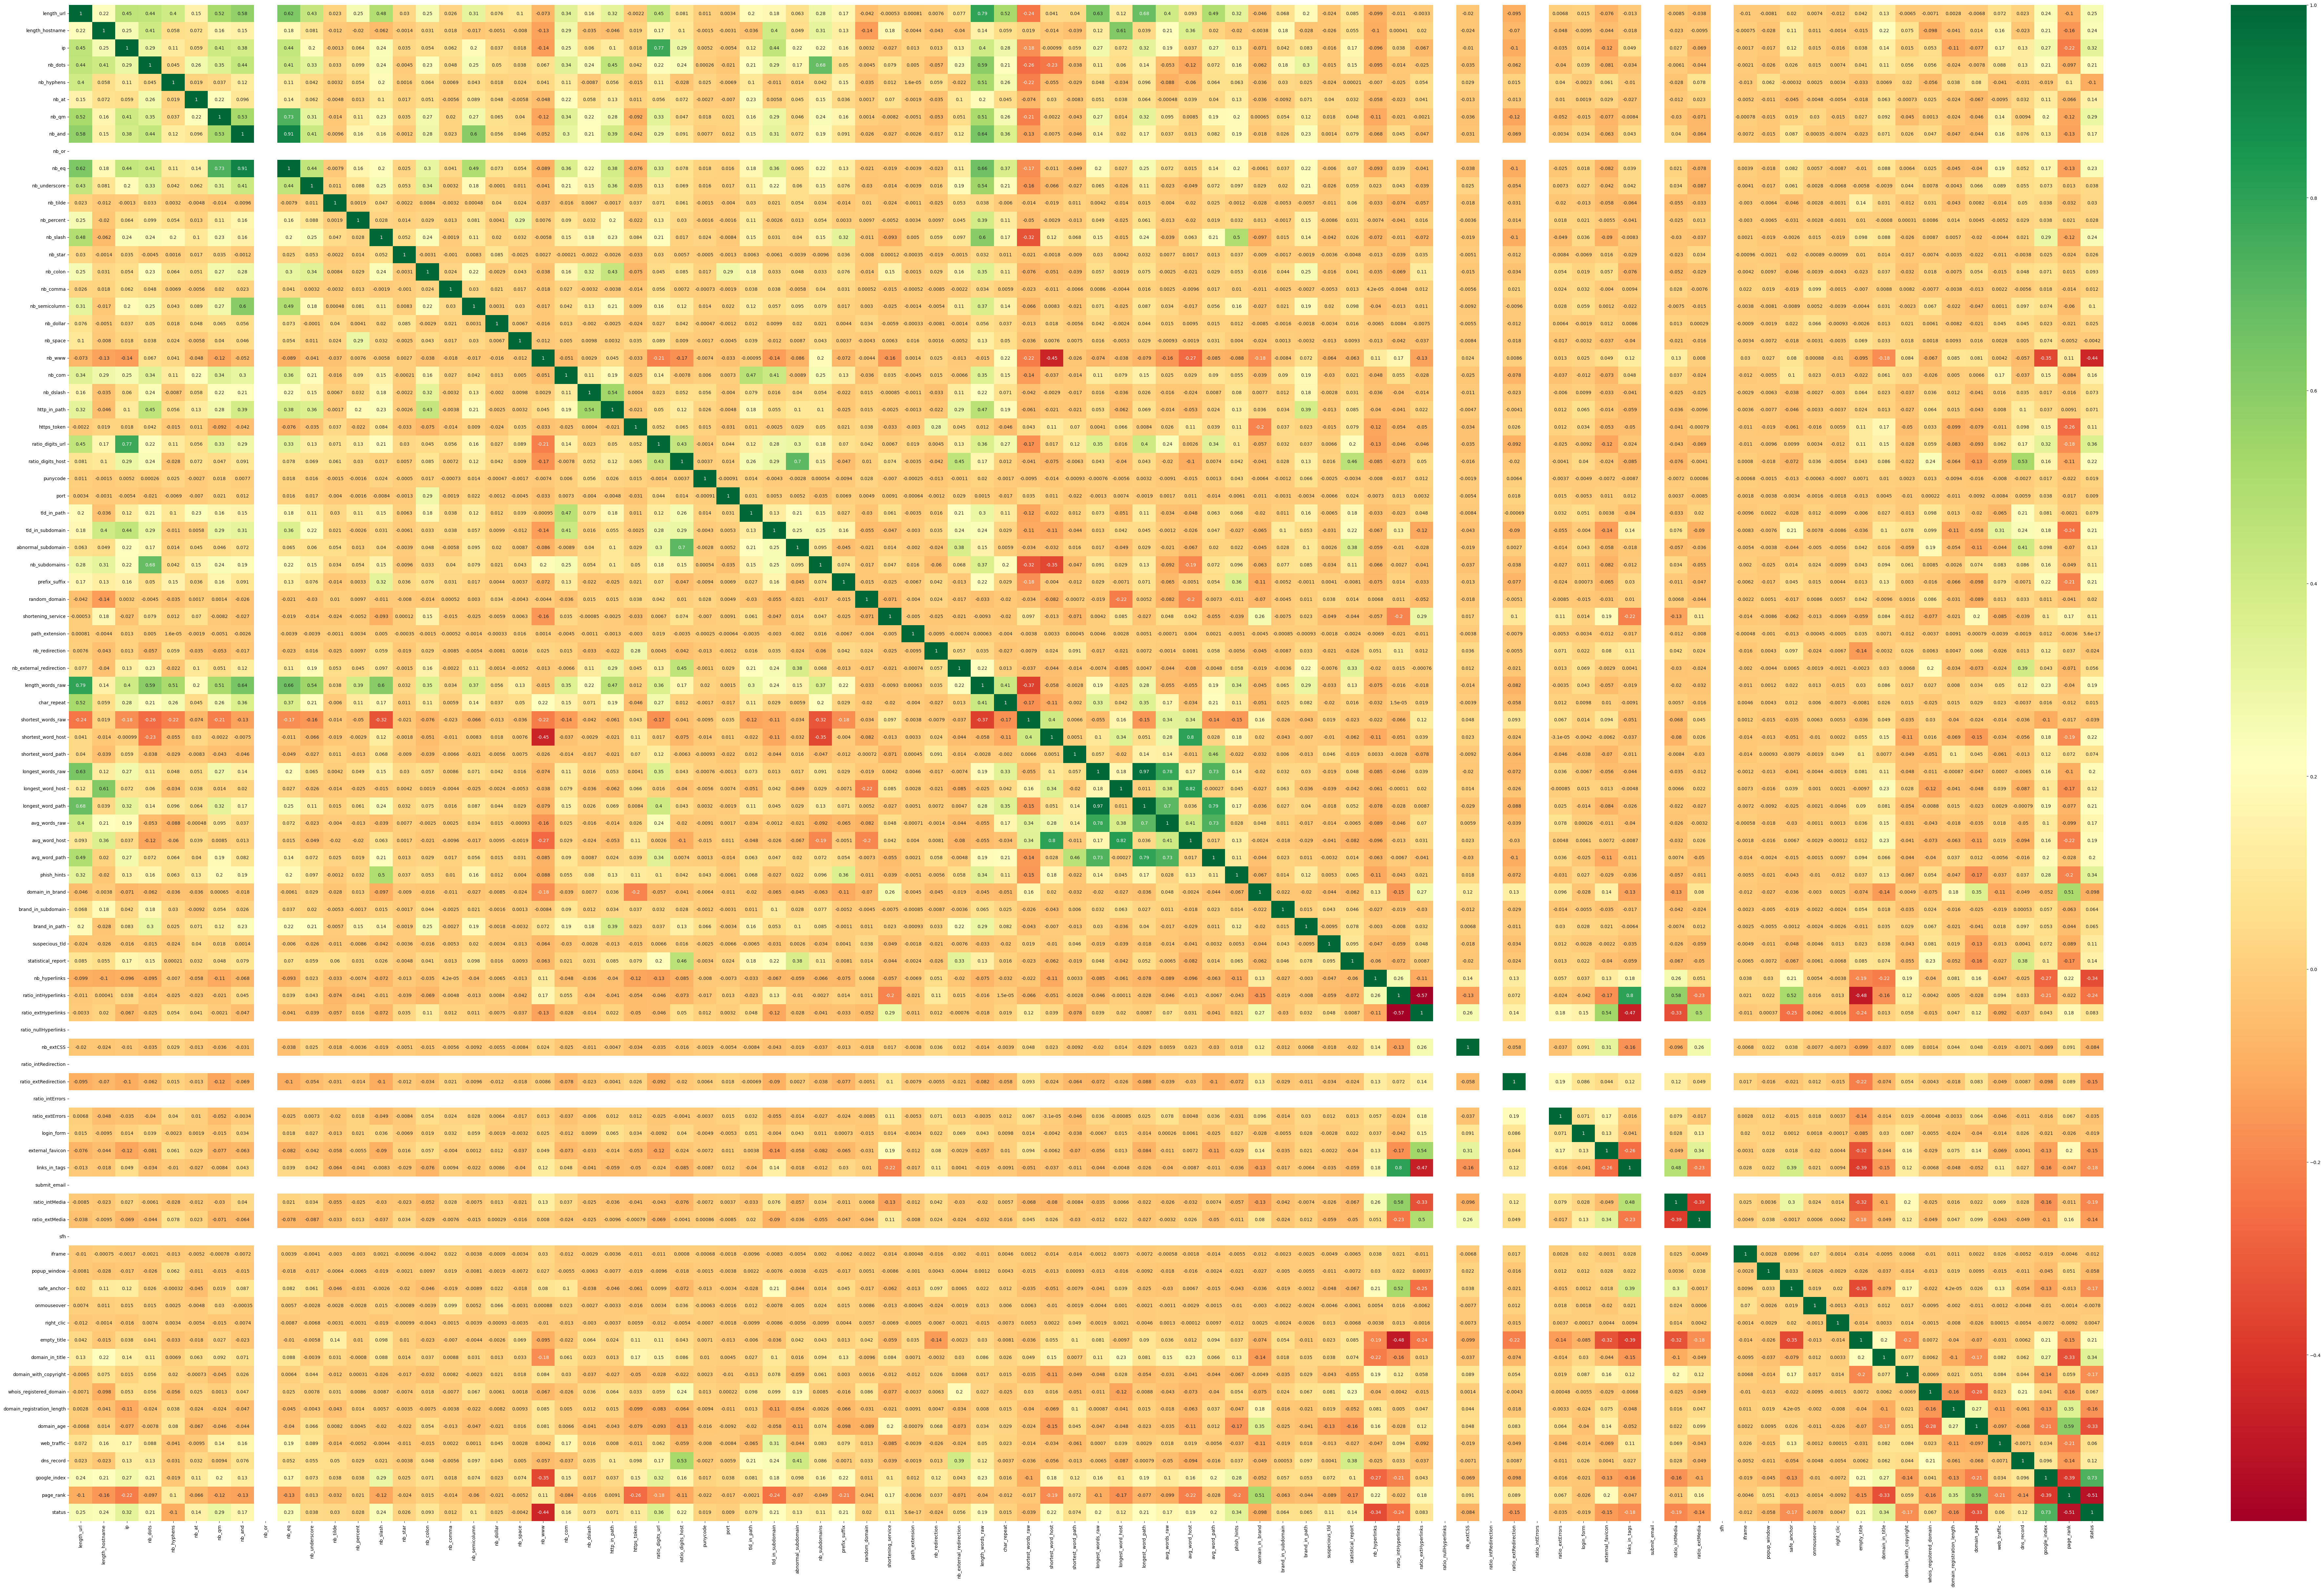

In [10]:
# Visualizing matrix using heatmap
plt.figure(figsize=(100,60))
sns.heatmap(corr_matrix, annot=True, cmap="RdYlGn")
plt.show()

Picking the correlation of all the features with only status feature. This gives the correlation of target feature with all the other features

In [11]:
status_score = corr_matrix['status']
status_score

length_url         0.248580
length_hostname    0.238322
ip                 0.321698
nb_dots            0.207029
nb_hyphens        -0.100107
                     ...   
web_traffic        0.060388
dns_record         0.122119
google_index       0.731171
page_rank         -0.511137
status             1.000000
Name: status, Length: 88, dtype: float64

In [12]:
# Picking up features with threshold > 0.2
features_selected = status_score[abs(status_score) > 0.2].index.tolist()
features_selected = [feature for feature in features_selected if feature != 'status']
features_selected

['length_url',
 'length_hostname',
 'ip',
 'nb_dots',
 'nb_qm',
 'nb_eq',
 'nb_slash',
 'nb_www',
 'ratio_digits_url',
 'ratio_digits_host',
 'tld_in_subdomain',
 'prefix_suffix',
 'shortest_word_host',
 'longest_words_raw',
 'longest_word_path',
 'phish_hints',
 'nb_hyperlinks',
 'ratio_intHyperlinks',
 'empty_title',
 'domain_in_title',
 'domain_age',
 'google_index',
 'page_rank']

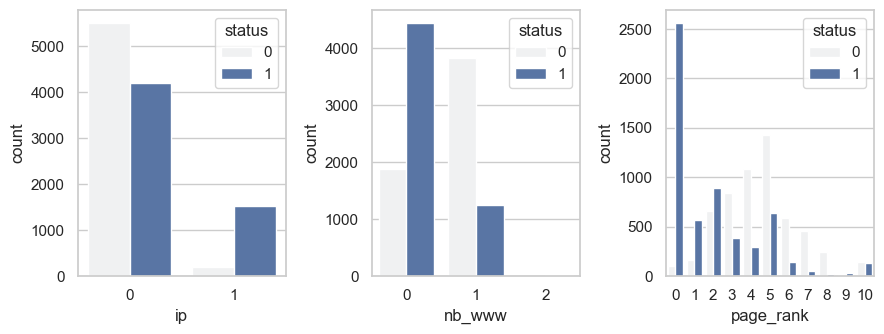

In [13]:
plt.rcParams["figure.figsize"] = [9.00, 3.50]
plt.rcParams["figure.autolayout"] = True
sns.set(style='whitegrid', color_codes=True)
f, axes = plt.subplots(1, 3)

sns.countplot(x='ip', hue='status', color='b', data=phishing_data, ax=axes[0])
sns.countplot(x='nb_www', hue='status', color='b', data=phishing_data, ax=axes[1])
sns.countplot(x='page_rank', hue='status', color='b', data=phishing_data, ax=axes[2])

plt.show()

From the above graphs, we can make the following observations:

If the URLs have domain name, then it is more likely that the URL is legitimate one whereas if the URL has IP address, then it is more likely that the URL is phishing.

If the URLs have 'www', then it is more likely that the URL is legitimate.

If the page rank of URL is less than 2, then it is more likely that the URL is phishing but if more than 2, then it is legitimate.

### Model creation and evaluation

In [14]:
# Predictor variables and Target variable
X = phishing_data[features_selected]
y = phishing_data['status']

print(X.shape)
print(y.shape)

(11430, 23)
(11430,)


In [15]:
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

Logistic Regression is a statistical model used for classification and predictive analysis. It is used to estimate the probability of an event occurring based on the dataset of independent variables.

In [16]:
# Logistic Regression
log_model = LogisticRegression(solver='liblinear', random_state=42)
log_model.fit(X_train, y_train)

y_pred = log_model.predict(X_test)
log_accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {log_accuracy * 100}")

Accuracy: 94.00699912510936


In [17]:
# Report of logistic regression
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      1157
           1       0.94      0.94      0.94      1129

    accuracy                           0.94      2286
   macro avg       0.94      0.94      0.94      2286
weighted avg       0.94      0.94      0.94      2286



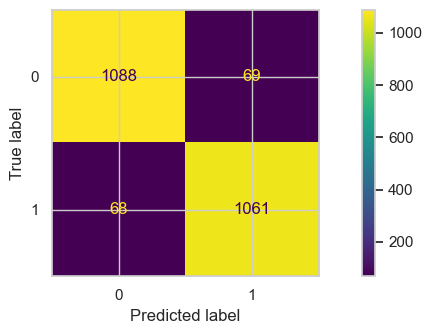

In [18]:
# Confusion matrix
con_matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=con_matrix).plot()

Random forests or random decision forests is an ensemble learning method for classification, regression and other tasks that operates by constructing a multitude of decision trees at training time. For classification tasks, the output of the random forest is the class selected by most trees. For regression tasks, the mean or average prediction of the individual trees is returned.

In [19]:
# Random Forest classifier
ran_model = RandomForestClassifier()
ran_model.fit(X_train, y_train)

y_pred = ran_model.predict(X_test)
ran_accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {ran_accuracy * 100}")

Accuracy: 96.01924759405074


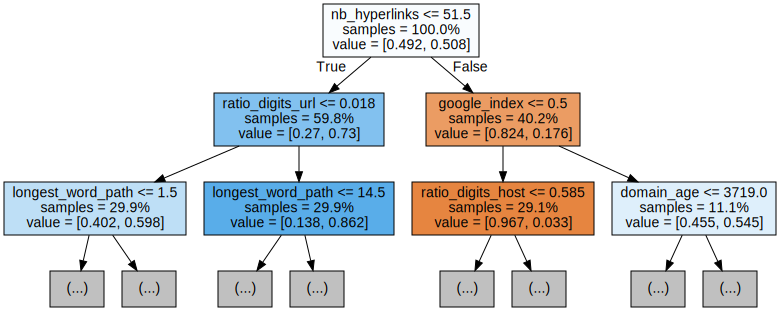

In [20]:
# Classification tree using random forest
tree = ran_model.estimators_[0]
dot_data = export_graphviz(tree,
                          feature_names=X_train.columns,  
                          filled=True,  
                          max_depth = 2,
                          impurity=False, 
                          proportion=True)
graph = graphviz.Source(dot_data)
display(graph)

<AxesSubplot:title={'center':'Feature Importance in Decreasing Order'}>

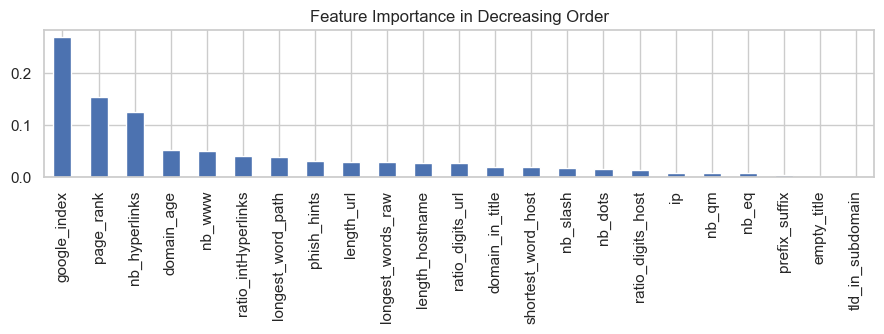

In [21]:
# Graph of the feature importances
feature_importance = pd.Series(ran_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_importance.plot(kind='bar',title='Feature Importance in Decreasing Order')

XGBoost classifier is a Machine learning algorithm that is applied for structured and tabular data. XGBoost is an implementation of gradient boosted decision trees designed for speed and performance. XGBoost is an extreme gradient boost algorithm.

In [22]:
# XGBoost classifier
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {xgb_accuracy * 100}")

Accuracy: 96.76290463692038


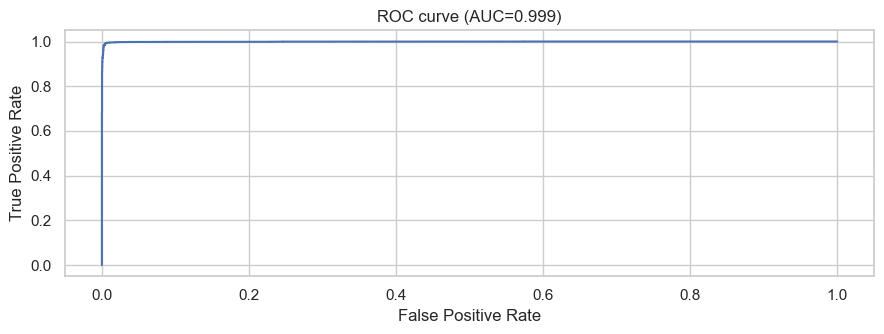

In [23]:
from sklearn.metrics import roc_curve, roc_auc_score
y_score = xgb_model.predict_proba(X)[:, 1]
fpr, tpr, thresholds = roc_curve(y, y_score)
auc = roc_auc_score(y, y_score)

# Plot the ROC curve
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC curve (AUC={auc:.3f})')
plt.show()

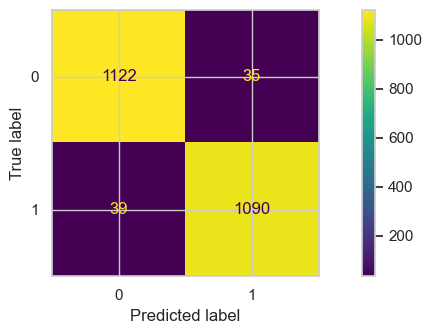

In [24]:
# Confusion matrix
con_matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=con_matrix).plot()

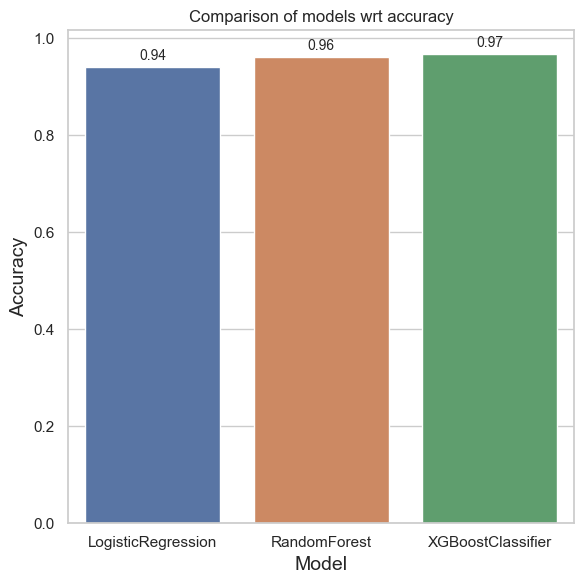

In [25]:
# Visualizing the accuracy obtained from different models
data = {"Model": ["LogisticRegression", "RandomForest", "XGBoostClassifier"],
        "Accuracy": [log_accuracy, ran_accuracy, xgb_accuracy]}
df = pd.DataFrame(data, columns=['Model', 'Accuracy'])
 
plt.figure(figsize=(6, 6))
plots = sns.barplot(x="Model", y="Accuracy", data=df)
for bar in plots.patches:
  plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')

plt.xlabel("Model", size=14)
plt.ylabel("Accuracy", size=14)
plt.title("Comparison of models wrt accuracy")
 
plt.show()

The models used are reasonably successful at predicting whether the test URLs were legitimate or were part of phishing attempts. All models had an accuracy above 90%. Of the models made, the XGBoost classifier model had the highest accuracy.

While these models can be refined further, this analysis is an effective demonstration of how data analytics can be used to learn new information and how machine learning can be used to safeguard against cybersecurity threats and thereby identify if a URL can lead to a phishing attack or not.